# LeNet
We recreate LeNet, the original CNN from Bell Labs by Yann LeCun

In [1]:
%matplotlib inline
import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from d2l import torch as d2l

## Load Data

In [2]:
# Load the FashionMNIST Dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

batch_size = 128

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

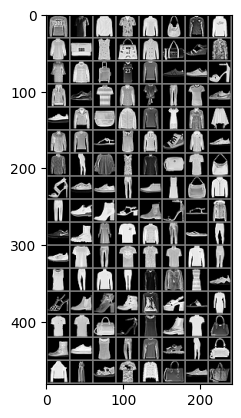

Pullover T-shirt/top Coat  Shirt Shirt Bag   Coat  Pullover Shirt Bag   Shirt Bag   Coat  Bag   Sandal Shirt Dress Coat  Bag   T-shirt/top Pullover Sneaker Sneaker Sandal Coat  Sneaker T-shirt/top Shirt Shirt Trouser T-shirt/top Sneaker Sneaker Coat  Bag   Coat  Pullover Dress Coat  Shirt Shirt Pullover Sandal Shirt Pullover Sneaker Coat  Sneaker Shirt Trouser Shirt Dress Shirt Bag   T-shirt/top Bag   Sandal Sneaker Sneaker Trouser Ankle Boot Dress Bag   Coat  Trouser Ankle Boot Ankle Boot Sandal Ankle Boot Sandal Sandal Coat  Sneaker Ankle Boot Dress T-shirt/top Coat  Trouser Sandal Trouser Sneaker T-shirt/top Trouser T-shirt/top T-shirt/top T-shirt/top Coat  Trouser T-shirt/top Trouser Pullover Trouser Pullover Shirt Dress Sneaker Sandal Ankle Boot Sandal Ankle Boot Pullover Sandal Sandal Dress T-shirt/top T-shirt/top Bag   Sandal Shirt Ankle Boot T-shirt/top Bag   Ankle Boot Sneaker Shirt Trouser Pullover Sandal Trouser Bag   Shirt Dress Sandal T-shirt/top Shirt Bag   Sneaker Bag  


In [4]:
# Visualize images from the dataset
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


## Build the Model

In [5]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv0 = nn.LazyConv2d(6,kernel_size=5,padding=2)
        self.act0 = nn.Sigmoid()
        self.pool0 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.LazyConv2d(16, kernel_size=5)
        self.act1 = nn.Sigmoid()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.flat = nn.Flatten()
        self.lin0 = nn.LazyLinear(120)
        self.act2 = nn.Sigmoid()
        self.lin1 = nn.LazyLinear(84)
        self.act3 = nn.Sigmoid()
        self.out = nn.LazyLinear(10)

    def forward(self, X):
        out = self.conv0(X)
        out = self.act0(out)
        out = self.pool0(out)
        out = self.conv1(out)
        out = self.act1(out)
        out = self.pool1(out)
        out = self.flat(out)
        out = self.lin0(out)
        out = self.act2(out)
        out = self.lin1(out)
        out = self.act3(out)
        out = self.out(out)
        return out

## Optimizer

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet().to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
total_step = len(trainloader)
total_step

469

## Training

In [12]:
total_step = len(trainloader)
num_epochs = 20
losses = []
accuracy = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):  
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        	
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        		
        if (i+1) % 400 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in testloader:
            images = images.to('cuda')
            labels = labels.to('cuda')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    if epoch == 0:
        losses = [loss.item()]
        accuracy = [100 * correct / total]
    else:
        losses.append(loss.item())
        accuracy.append(100 * correct / total)

print('Finished Training')

Epoch [1/20], Step [400/469], Loss: 2.3103
Epoch [2/20], Step [400/469], Loss: 1.2395
Epoch [3/20], Step [400/469], Loss: 0.7730
Epoch [4/20], Step [400/469], Loss: 0.6272
Epoch [5/20], Step [400/469], Loss: 0.4241
Epoch [6/20], Step [400/469], Loss: 0.4987
Epoch [7/20], Step [400/469], Loss: 0.4432
Epoch [8/20], Step [400/469], Loss: 0.4946
Epoch [9/20], Step [400/469], Loss: 0.3247
Epoch [10/20], Step [400/469], Loss: 0.4159
Epoch [11/20], Step [400/469], Loss: 0.3368
Epoch [12/20], Step [400/469], Loss: 0.2190
Epoch [13/20], Step [400/469], Loss: 0.2379
Epoch [14/20], Step [400/469], Loss: 0.4197
Epoch [15/20], Step [400/469], Loss: 0.3117
Epoch [16/20], Step [400/469], Loss: 0.2413
Epoch [17/20], Step [400/469], Loss: 0.4162
Epoch [18/20], Step [400/469], Loss: 0.2783
Epoch [19/20], Step [400/469], Loss: 0.1149
Epoch [20/20], Step [400/469], Loss: 0.2927
Finished Training


Accuracy of the network on the 10000 test images: 88.28 %


Text(0.5, 1.0, 'Accuracy')

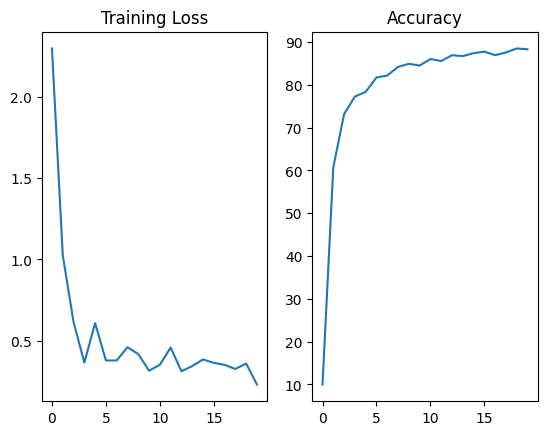

In [13]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
plt.figure()
plt.subplot(1,2,1)
plt.plot(losses)
plt.title('Training Loss')
plt.subplot(1,2,2)
plt.plot(accuracy)
plt.title('Accuracy')